In [1]:
#allow output from every Line
from IPython.core. interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
import pandas as pd
from pybaseball import batting_stats
import random
import numpy as np
import statistics
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# this is a function that takes a list of 1's and 0's and returns the 'streaks' and 'slumps' in
# the list. for the purpose of my project, I am primarily interested in the streaks.
def streaks_and_slumps(numbers):
    #create open lists
    streaks = []
    slumps = []
    
    #we'll take the first in the list, and assign it to current number, ans start the count at 1
    current_count = 1
    current_number = numbers[0]

    for number in numbers[1:]:
        #if the next number is the same as current number, increase count by 1
        if number == current_number:
            current_count += 1
        else:
            #assign it to wither streaks or slumps depending on if it was a 0 or 1
            if current_number == 1:
                streaks.append(current_count)
            else:
                slumps.append(current_count)
            #reset count to 1 and set the streak breaking number to the new current number    
            current_count = 1
            current_number = number

    if current_number == 1:
        streaks.append(current_count)
    else:
        slumps.append(current_count)

    return streaks, slumps

In [4]:
# I saved the results from the simulations to a .csv. Much easier to just load from here if needed and keep working
data = pd.read_csv("data.csv")

In [17]:
#I want to create a new df which describes each MLB simulation and it's largest hit streak
sim_max = pd.DataFrame({'sim': range(1, 1001),
                        'max': data.max(axis=0)[10:1010]})
sim_max = sim_max.reset_index()

# add a column to specify the player(s) that got the hit streak
max_names = []

for col in data.columns[10:1010]:
    max_indices = data[col] == data[col].max()
    names = data.loc[max_indices, 'Name']
    if len(names) == 0:
        max_names.append('')
    else:
        max_names.append(', '.join(names))

sim_max['max_name'] = max_names

In [ ]:
# this creates duplicate rows for the sims that had multiple players with the same longest hit streak
# now each row is not necesarily a uniq MLB sim..
new_rows = []

for index, row in sim_max.iterrows():
    if ',' in row['max_name']:
        names = row['max_name'].split(',')
        for name in names:
            new_row = row.copy()
            new_row['max_name'] = name.strip()
            new_rows.append(new_row)
    else:
        new_rows.append(row)
        
sim_max = pd.DataFrame(new_rows)

sim_max.reset_index(drop=True, inplace=True)

In [8]:
#data
#sim_max

In [16]:
len(sim_max['max_name'].unique())
sum(sim_max['max_name'] =='Joe DiMaggio')
sim_max[sim_max['max_name'] =='Joe DiMaggio']
sim_max['max_name'].value_counts().head(33)

272

8

,index,sim,max,max_name
115,career long from MLB sim 109,109,47,Joe DiMaggio
218,career long from MLB sim 204,204,54,Joe DiMaggio
509,career long from MLB sim 472,472,60,Joe DiMaggio
655,career long from MLB sim 607,607,50,Joe DiMaggio
672,career long from MLB sim 624,624,45,Joe DiMaggio
762,career long from MLB sim 707,707,69,Joe DiMaggio
847,career long from MLB sim 780,780,47,Joe DiMaggio
1061,career long from MLB sim 976,976,52,Joe DiMaggio


max_name
Ross Barnes           94
Cal McVey             57
Ty Cobb               43
Ed Delahanty          27
Dave Orr              25
Willie Keeler         25
George Sisler         24
Al Simmons            21
Lip Pike              20
Cap Anson             20
Pete Browning         19
Sam Thompson          18
Nap Lajoie            16
Jesse Burkett         16
Joe Jackson           15
Dan Brouthers         14
Rogers Hornsby        14
Tony Gwynn            13
Deacon White          12
Paul Hines            11
Billy Hamilton        11
Josh Gibson           11
Jim O'Rourke          10
George Van Haltren    10
Harry Heilmann         9
Heinie Manush          9
Dobie Moore            8
Oscar Charleston       8
George Wright          8
Derek Jeter            8
Joe DiMaggio           8
Tip O'Neill            8
Tris Speaker           8
Name: count, dtype: int64

(array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  2.,  7., 11.,
        39., 29., 60., 55., 58., 73., 71., 73., 66., 70., 55., 56., 49.,
        42., 33., 46., 27., 26., 20., 15., 13., 15., 16.,  9.,  3.,  8.,
         7.,  5.,  6.,  2.,  4.,  6.,  4.,  0.,  1.,  1.,  0.,  1.,  3.,
         0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]),
 array([29.5, 30.5, 31.5, 32.5, 33.5, 34.5, 35.5, 36.5, 37.5, 38.5, 39.5,
        40.5, 41.5, 42.5, 43.5, 44.5, 45.5, 46.5, 47.5, 48.5, 49.5, 50.5,
        51.5, 52.5, 53.5, 54.5, 55.5, 56.5, 57.5, 58.5, 59.5, 60.5, 61.5,
        62.5, 63.5, 64.5, 65.5, 66.5, 67.5, 68.5, 69.5, 70.5, 71.5, 72.5,
        73.5, 74.5, 75.5, 76.5, 77.5, 78.5, 79.5, 80.5, 81.5, 82.5, 83.5,
        84.5, 85.5, 86.5, 87.5, 88.5, 89.5, 90.5, 91.5, 92.5, 93.5, 94.5]),
 <BarContainer object of 65 artists>)

Text(0.5, 0, 'Longest Hit Streak')

Text(0, 0.5, 'Frequency')

Text(0.5, 1.0, 'Histogram of Longest Hit Streak From MLB Simulations')

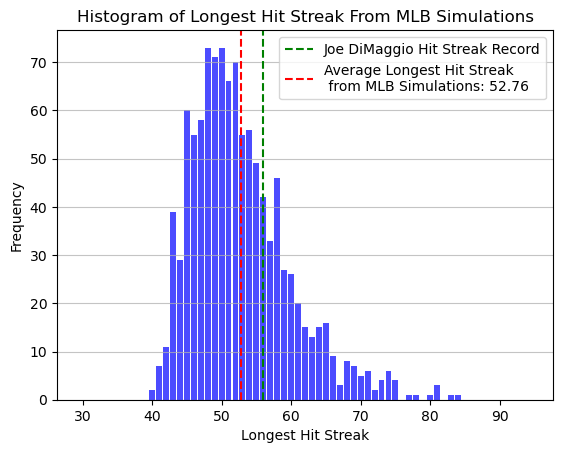

In [10]:
#plot that shows distribution of hit streak records from all sims
min_value = int(sim_max['max'].min()) - 10.5
max_value = int(sim_max['max'].max()) + 10.5

plt.hist(sim_max['max'], bins=np.arange(min_value, max_value + 1, 1), color='blue', alpha=0.7, rwidth=0.85)

plt.xlabel('Longest Hit Streak')
plt.ylabel('Frequency')
plt.title('Histogram of Longest Hit Streak From MLB Simulations')

plt.axvline(x=56, color='green', linestyle='--', label='Joe DiMaggio Hit Streak Record')

average_hit_streak = sim_max['max'].mean()
plt.axvline(x=average_hit_streak, color='red', linestyle='--', label=f'Average Longest Hit Streak \n from MLB Simulations: {average_hit_streak:.2f}') # Added newline (\n) for line break

plt.legend()

plt.grid(axis='y', alpha=0.75)
plt.savefig('mlb_sim.png', dpi=300)
plt.show()

In [11]:
sim_max['max'].mean()
sim_max['max'].median()
sim_max['max'].max()
sum(sim_max['max'] > 56)
sum(sim_max['max'] > 56) / len(sim_max['max'])

52.76124885215794

52.0

84

273

0.25068870523415976

In [12]:
#This creates a df that contains data from Joe DiMaggio's sims from Part 1. I want to see how the sim
#accuracy feels as compared to DiMaggio sims from Part 2
dimaggio_row = data[data['Name'] == 'Joe DiMaggio'].iloc[0].iloc[10:1010]
dim2 = pd.DataFrame(columns=['sim', 'streak'])
dim2['sim'] = range(1, 1001)
dim2['streak'] = dimaggio_row.values
#dim2
#data[data['Name'] =='Joe DiMaggio']

,sim,streak
0,1,31
1,2,23
2,3,26
3,4,21
4,5,32
...,...,...
995,996,29
996,997,39
997,998,21
998,999,18


,index,IDfg,Name,G,H,PA,hit%,PA rate,PA_m,hit_e_p,...,career long from MLB sim 993,career long from MLB sim 994,career long from MLB sim 995,career long from MLB sim 996,career long from MLB sim 997,career long from MLB sim 998,career long from MLB sim 999,career long from MLB sim 1000,player longest long,player average long
34,17,1003311,Joe DiMaggio,1736,2214,7671,0.288619,4.418779,4,0.418779,...,26,25,30,29,39,21,18,20,69,25.575


In [13]:
#plot that compares distributions from both Sim methods (DiMaggio from part 1 compared to DiMaggio
#from part 2)
mean_dim2 = dim2['streak'].mean()

mean_dataY = dataY['long'].mean()

sns.kdeplot(data=dim2['streak'], label='DiMaggio Distribution from Part 1', cumulative=False, bw_adjust=0.7, common_norm=False, common_grid=False)
sns.kdeplot(data=dataY['long'], label='DiMaggio Distribution from Part 2', cumulative=False, bw_adjust=0.7, common_norm=False, common_grid=False)

plt.xlim(x_range)

plt.xlabel('Value')
plt.ylabel('Proportion')
plt.title('Comparison of DiMaggio Distributions: Part 1 vs. Part 2')

plt.axvline(x=mean_dim2, color=sns.color_palette()[0], linestyle='--', label='Mean of Part 1: {:.2f}'.format(mean_dim2))
plt.axvline(x=mean_dataY, color=sns.color_palette()[1], linestyle='--', label='Mean of Part 2: {:.2f}'.format(mean_dataY))

plt.legend()

plt.savefig('dist_comp.png', dpi=300)
plt.show()

NameError: name 'dataY' is not defined